# Overshadowing Attacks 2

Performing overshadowing attacks with realistic parameters so we can understand the attacker's constraints with given hardware.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
palette = 'colorblind'

sns.set_theme(palette=palette, color_codes=True)
sns.set_style('ticks')
sns.set_context('notebook')
sns.color_palette(palette)

plt.rcParams['figure.dpi'] = 200 # 72
#plt.rcParams['savefig.dpi'] = 200

In [24]:
# Load overshadow_results.csv into a pandas dataframe
df = pd.read_csv('data/overshadow_results.csv')

# Change df columns to [filename, num, bit]
df.columns = ['filename', 'num', 'bit']
df.head()

,filename,num,bit
0,out-000.1,31,0
1,out-000.1,25165753,1
2,out-000.2,31,0
3,out-000.2,25165753,1
4,out-000.3,31,0


In [38]:
data = []

for f in df.filename.unique():
    count_1 = df[(df.filename == f) & (df.bit == 1)].num.iloc[0]
    count_0 = df[(df.filename == f) & (df.bit == 0)].num.iloc[0]
    accuracy = count_1 / (count_1 + count_0)
    gain = float(f.split('-')[1]) * (-1)
    data.append([gain, accuracy])

# Turn data into pandas dataframe
df_data = pd.DataFrame(data, columns=['gain', 'accuracy'])
df_data

,gain,accuracy
0,-0.1,0.999999
1,-0.2,0.999999
2,-0.3,0.999999
3,-0.4,0.999999
4,-0.6,0.999999
...,...,...
995,-99.6,0.499989
996,-99.7,0.499987
997,-99.8,0.499983
998,-99.9,0.499983


<AxesSubplot:xlabel='gain', ylabel='accuracy'>

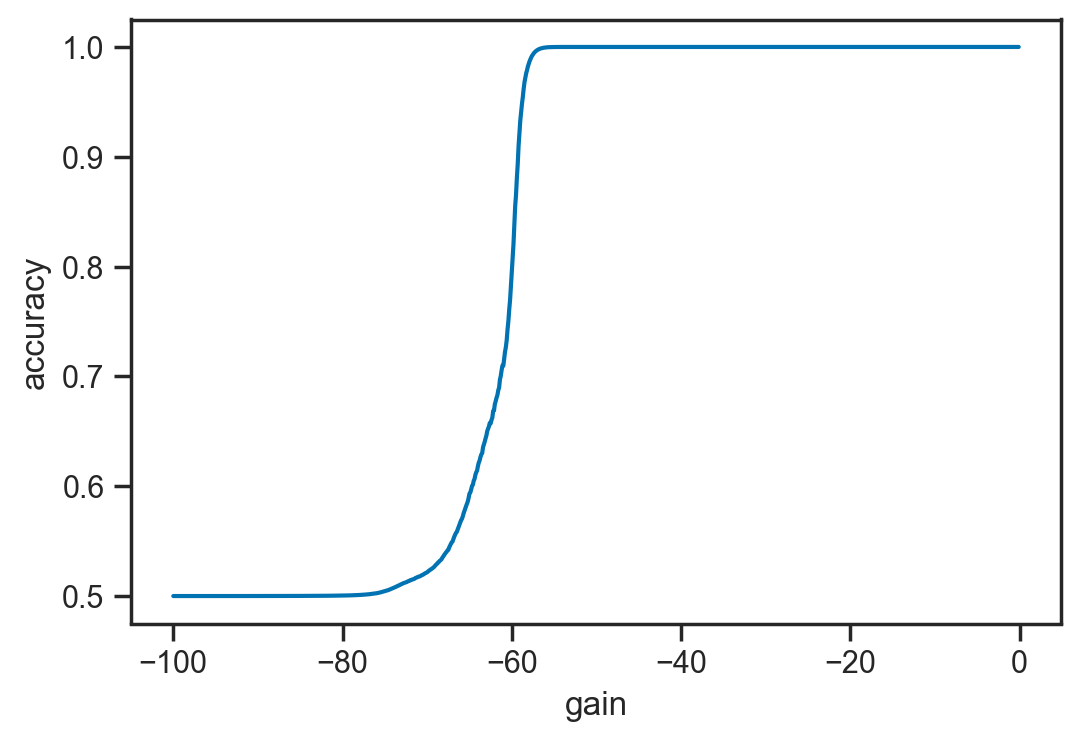

In [39]:
sns.lineplot(data=df_data, x='gain', y='accuracy', ci=None)

In [60]:
def loss_distance(distance):
    return 20 * np.log10(distance)

def loss_frequency(frequency):
    return 20 * np.log10(frequency)

loss_const = 32.45
frequency = 8160

def get_gain(base_gain, distance):
    return base_gain - loss_distance(distance) - loss_frequency(frequency) - loss_const

In [48]:
gain(0, 1)

-110.68380317507723

In [64]:
# Given base_gain and distance, find the accuracy from df_data
def get_accuracy(base_gain, distance):
    gain = get_gain(base_gain, distance)
    gain = min(gain, df_data.gain.max())
    gain = max(gain, df_data.gain.min())
    return df_data[df_data.gain == np.round(gain, decimals=1)].accuracy.iloc[0]

In [62]:
df_data[df_data.gain == -0.5].accuracy.iloc[0]

0.9999987681687167

In [112]:
base_gains = np.arange(0, 100.1, 0.1)
distances = np.arange(0, 10.01, 0.01)

data = []
for base_gain in base_gains:
    for distance in distances:
        data.append([base_gain, distance, get_accuracy(np.round(base_gain, decimals=1), np.round(distance, decimals=2))])

df_data_accuracy = pd.DataFrame(data, columns=['base_gain', 'distance', 'accuracy'])
df_data_accuracy.set_index(['base_gain', 'distance'], inplace=True)
df_data_accuracy.head()

/var/folders/m7/dd6y_0nj5t51g140cqn3qnmw0000gn/T/ipykernel_91946/574862479.py:2: RuntimeWarning: divide by zero encountered in log10
  return 20 * np.log10(distance)


accuracy
base_gain distance          
0.0       0.00      0.999999
          0.01      0.518740
          0.02      0.501785
          0.03      0.500391
          0.04      0.500201

In [113]:
# Pivot df_data_accuracy to get accuracy for each base_gain and distance
df_data_accuracy_pivot = df_data_accuracy.unstack()
df_data_accuracy_pivot.columns = df_data_accuracy_pivot.columns.get_level_values(1)
df_data_accuracy_pivot.head()

distance,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,9.91,9.92,9.93,9.94,9.95,9.96,9.97,9.98,9.99,10.00
base_gain,,,,,,,,,,,,,,,,,,,,,
0.0,0.999999,0.518740,0.501785,0.500391,0.500201,0.500111,0.500053,0.500034,0.500023,0.500014,...,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985
0.1,0.999999,0.519068,0.501878,0.500415,0.500204,0.500108,0.500057,0.500032,0.500021,0.500011,...,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985
0.2,0.999999,0.519403,0.501973,0.500426,0.500213,0.500114,0.500065,0.500035,0.500020,0.500014,...,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985
0.3,0.999999,0.519938,0.502082,0.500450,0.500217,0.500117,0.500070,0.500036,0.500023,0.500014,...,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985
0.4,0.999999,0.520426,0.502164,0.500465,0.500216,0.500117,0.500071,0.500042,0.500020,0.500012,...,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985,0.499985


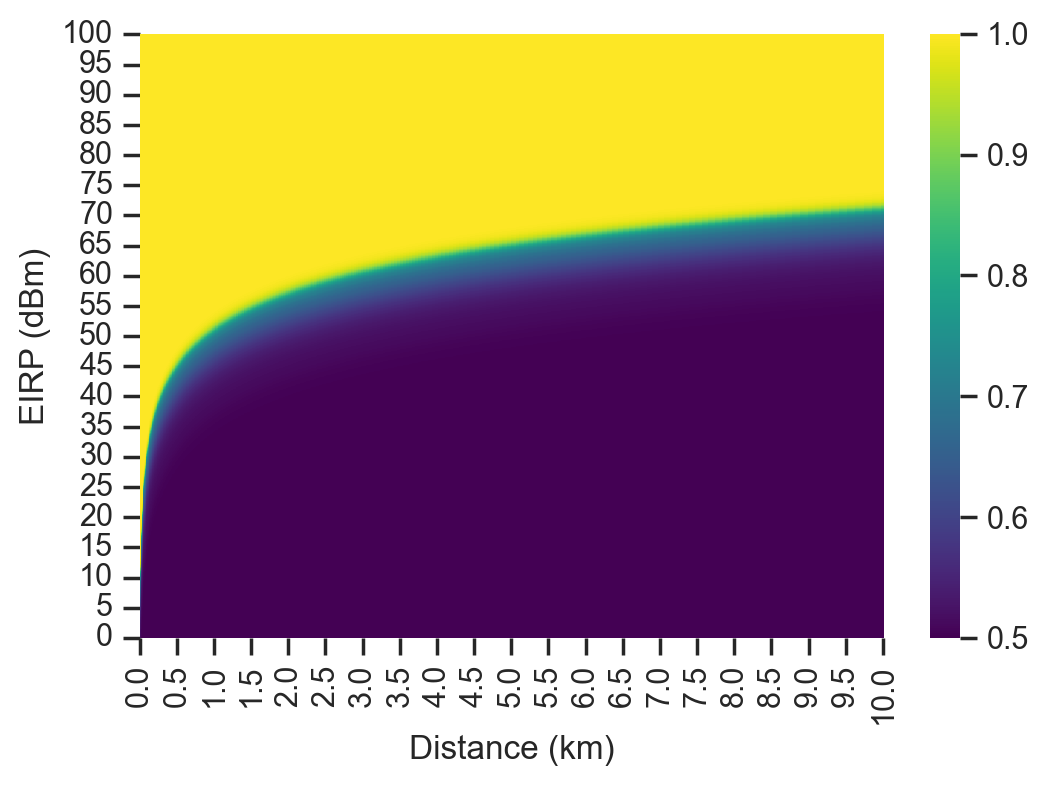

In [164]:
ax = sns.heatmap(df_data_accuracy_pivot, cmap='viridis', vmin=0.5, vmax=1)

plt.xlabel("Distance (km)")
plt.ylabel("EIRP (dBm)")

xticklabels = np.arange(0, 10.5, 0.5)
xticks = np.where(np.in1d(distances, xticklabels))[0]
plt.xticks(xticks, xticklabels)

yticklabels = np.arange(0, 105, 5)
yticks = np.where(np.in1d(base_gains, yticklabels))[0]
plt.yticks(yticks, yticklabels)

ax.invert_yaxis()

plt.savefig("plots/distance_eirp_heatmap.pdf", bbox_inches='tight')

In [123]:
df_data_accuracy[df_data_accuracy.accuracy > 0.95].groupby('distance').min()

,accuracy
distance,
0.00,0.999999
0.01,0.954237
0.02,0.954237
0.03,0.954237
0.04,0.954237
...,...
9.96,0.954237
9.97,0.954237
9.98,0.954237


In [165]:
df_data_accuracy_reindex = df_data_accuracy.reset_index()
df_data_accuracy_distance = df_data_accuracy_reindex[df_data_accuracy_reindex.accuracy > 0.95].groupby('distance').min().reset_index()

#df_data_accuracy_distance = pd.concat([df_data_accuracy_distance, df_data_accuracy_reindex[df_data_accuracy_reindex.accuracy > 0.91].groupby('distance').min().reset_index()], ignore_index=True)
#df_data_accuracy_distance = pd.concat([df_data_accuracy_distance, df_data_accuracy_reindex[df_data_accuracy_reindex.accuracy > 0.99].groupby('distance').min().reset_index()], ignore_index=True)

df_data_accuracy_distance

,distance,base_gain,accuracy
0,0.00,0.0,0.999999
1,0.01,12.0,0.954237
2,0.02,18.0,0.954237
3,0.03,21.5,0.954237
4,0.04,24.0,0.954237
...,...,...,...
996,9.96,71.9,0.954237
997,9.97,72.0,0.954237
998,9.98,72.0,0.954237
999,9.99,72.0,0.954237


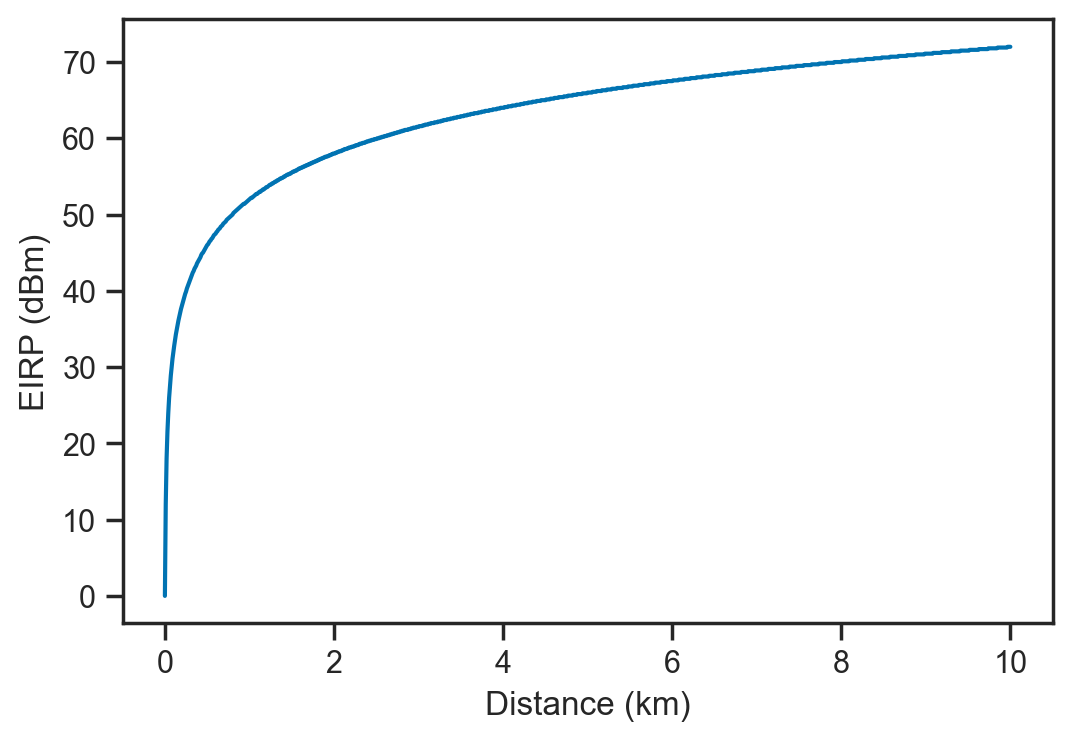

In [166]:
ax = sns.lineplot(data=df_data_accuracy_distance, x='distance', y='base_gain')

plt.xlabel("Distance (km)")
plt.ylabel("EIRP (dBm)")

plt.savefig("plots/distance_eirp_95.pdf", bbox_inches='tight')